<a href="https://colab.research.google.com/github/hsantos1985/core_projects/blob/main/PROJETO_MEDIA_MOVEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##ANÁLISE DE MÉDIA MÓVEL PARA OS CASOS DE COVID DA CIDADE DE SÃO PAULO

#####-O OBJETIVO DO NOTEBOOK É APLICAR A MÉDIA MOVEL PARA OS DADOS DO COVID DA CIDADE DE SÃO PAULO-SP.

---Repositório de dados sobre casos e óbitos decorrentes do COVID-19 nos municípios do Estado de São Paulo e sobre leitos e internações por Departamento Regional de Saúde.

---O SEADE mantém um painel de dados sobre casos e óbitos relacionados ao coronavírus no Estado de São Paulo a partir de dados oficiais da Secretaria de Estado da Saúde de São Paulo (SES). Os dados estão disponíveis em https://www.seade.gov.br/coronavirus/.


--Os dados estão disponíveis em:
https://github.com/seade-R/dados-covid-sp


####1-BIBLIOTECAS

In [1]:
install.packages("dplyr")
install.packages('forecast')
install.packages("tidyr")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘fracdiff’, ‘lmtest’, ‘timeDate’, ‘tseries’, ‘urca’, ‘zoo’, ‘RcppArmadillo’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
library(forecast)
library(dplyr)
library(tidyr)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [3]:
#configuração dos gráficos
options(repr.plot.width = 19, repr.plot.height = 10)

####2-OBTENÇÃO DOS DADOS

#####2.1-BUSCANDO OS ARQUIVOS

In [6]:
#OBTENDO OS DADOS
#SETANDO O DIRETÓRIO DE DADOS
#COMO NÃO É AMBIENTE PYTHN NÃO DÁ PARA MONTAR O DRIVE, PARA OBTER A PASTA
#DESTA FORMA OS ARQUIVOS SERÃO UPADOS INDIVIDUALMENTE
covid_sp<-
  read.csv('/content/dados_covid_sp.csv', sep = ";")


In [7]:
View(covid_sp)

nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,⋯,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem
<chr>,<int>,<int>,<int>,<chr>,<int>,<int>,<chr>,<chr>,<int>,⋯,<chr>,<int>,<int>,<int>,<int>,<chr>,<int>,<chr>,<chr>,<int>
Adamantina,3500105,25,2,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,⋯,Marília,5,33894,7398,41199,0,8,"-21,6820","-51,0737",9
Adolfo,3500204,25,2,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,⋯,São José do Rio Preto,15,3447,761,21106,0,8,"-21,2325","-49,6451",9
Aguaí,3500303,25,2,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,⋯,São João da Boa Vista,14,35608,5245,47455,0,8,"-22,0572","-46,9735",9
Águas da Prata,3500402,25,2,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,⋯,São João da Boa Vista,14,7797,1729,14267,0,8,"-21,9319","-46,7176",9
Águas de Lindóia,3500501,25,2,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,⋯,Campinas,3,18374,3275,6013,0,8,"-22,4733","-46,6314",9
Águas de Santa Bárbara,3500550,25,2,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,⋯,Bauru,12,5931,1106,40446,0,8,"-22,8812","-49,2421",9
Águas de São Pedro,3500600,25,2,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,⋯,Piracicaba,11,3122,764,361,0,8,"-22,5977","-47,8734",9
Agudos,3500709,25,2,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,⋯,Bauru,12,36134,5524,96671,0,8,"-22,4694","-48,9863",9
Alambari,3500758,25,2,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,⋯,Sorocaba,6,5779,830,1596,0,8,"-23,5503","-47,8980",9


In [8]:
#utilizando o cv2 para variáveis numéricas e utiliando o enconding utf8
covid_sp<-
  read.csv2('/content/dados_covid_sp.csv', sep = ";",encoding="UTF-8")

In [9]:
View(covid_sp)

nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,⋯,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem
<chr>,<int>,<int>,<int>,<chr>,<int>,<int>,<dbl>,<dbl>,<int>,⋯,<chr>,<int>,<int>,<int>,<int>,<chr>,<int>,<dbl>,<dbl>,<int>
Adamantina,3500105,25,2,2020-02-25,0,0,0,0,0,⋯,Marília,5,33894,7398,41199,0,8,-21.6820,-51.0737,9
Adolfo,3500204,25,2,2020-02-25,0,0,0,0,0,⋯,São José do Rio Preto,15,3447,761,21106,0,8,-21.2325,-49.6451,9
Aguaí,3500303,25,2,2020-02-25,0,0,0,0,0,⋯,São João da Boa Vista,14,35608,5245,47455,0,8,-22.0572,-46.9735,9
Águas da Prata,3500402,25,2,2020-02-25,0,0,0,0,0,⋯,São João da Boa Vista,14,7797,1729,14267,0,8,-21.9319,-46.7176,9
Águas de Lindóia,3500501,25,2,2020-02-25,0,0,0,0,0,⋯,Campinas,3,18374,3275,6013,0,8,-22.4733,-46.6314,9
Águas de Santa Bárbara,3500550,25,2,2020-02-25,0,0,0,0,0,⋯,Bauru,12,5931,1106,40446,0,8,-22.8812,-49.2421,9
Águas de São Pedro,3500600,25,2,2020-02-25,0,0,0,0,0,⋯,Piracicaba,11,3122,764,361,0,8,-22.5977,-47.8734,9
Agudos,3500709,25,2,2020-02-25,0,0,0,0,0,⋯,Bauru,12,36134,5524,96671,0,8,-22.4694,-48.9863,9
Alambari,3500758,25,2,2020-02-25,0,0,0,0,0,⋯,Sorocaba,6,5779,830,1596,0,8,-23.5503,-47.8980,9


In [10]:
#VERIFICANDO A QUANTIDADE DE LINHAS E COLUNAS DO DATASET
dim(covid_sp)

[1] 777784     26

In [11]:
#verificando o tipo dos dados
str(covid_sp)

'data.frame':	777784 obs. of  26 variables:
 $ nome_munic   : chr  "Adamantina" "Adolfo" "Aguaí" "Águas da Prata" ...
 $ codigo_ibge  : int  3500105 3500204 3500303 3500402 3500501 3500550 3500600 3500709 3500758 3500808 ...
 $ dia          : int  25 25 25 25 25 25 25 25 25 25 ...
 $ mes          : int  2 2 2 2 2 2 2 2 2 2 ...
 $ datahora     : chr  "2020-02-25" "2020-02-25" "2020-02-25" "2020-02-25" ...
 $ casos        : int  0 0 0 0 0 0 0 0 0 0 ...
 $ casos_novos  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ casos_pc     : num  0 0 0 0 0 0 0 0 0 0 ...
 $ casos_mm7d   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ obitos       : int  0 0 0 0 0 0 0 0 0 0 ...
 $ obitos_novos : int  0 0 0 0 0 0 0 0 0 0 ...
 $ obitos_pc    : num  0 0 0 0 0 0 0 0 0 0 ...
 $ obitos_mm7d  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ letalidade   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ nome_ra      : chr  "RA de Presidente Prudente" "RA de São José do Rio Preto" "RA de Campinas" "RA de Campinas" ...
 $ cod_ra       : int  9 14 4 4 4 13 4 3 13 9 ...


#####2.1-VERIFICAÇÃO DOS DADOS AUSENTES

In [12]:
# NA = valores ausentes
sapply(covid_sp,function(x) sum(is.na(x)))

nome_munic   codigo_ibge           dia           mes      datahora 
            0             0             0             0             0 
        casos   casos_novos      casos_pc    casos_mm7d        obitos 
            0             0             0             0             0 
 obitos_novos     obitos_pc   obitos_mm7d    letalidade       nome_ra 
            0             0             0             0             0 
       cod_ra      nome_drs       cod_drs           pop        pop_60 
            0             0             0             0             0 
         area       map_leg     map_leg_s      latitude     longitude 
            0             0          1204             0             0 
semana_epidem 
            0

In [13]:
#somente map legs com valores ausentes

In [14]:
# NAN = not a number(valor indefinido)
sapply(covid_sp,function(x) sum(is.nan(x)))

nome_munic   codigo_ibge           dia           mes      datahora 
            0             0             0             0             0 
        casos   casos_novos      casos_pc    casos_mm7d        obitos 
            0             0             0             0             0 
 obitos_novos     obitos_pc   obitos_mm7d    letalidade       nome_ra 
            0             0             0             0             0 
       cod_ra      nome_drs       cod_drs           pop        pop_60 
            0             0             0             0             0 
         area       map_leg     map_leg_s      latitude     longitude 
            0             0             0             0             0 
semana_epidem 
            0

In [15]:
#sem dados indefinidos

####3-TRATAMENTO DOS DADOS

In [16]:
#SUBSTITUIÇÃO DOS MISSING VALUES
covid_sp2<-
  covid_sp %>%
    mutate_all(replace_na,0)

In [17]:
covid_sp2

nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,⋯,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem
<chr>,<int>,<int>,<int>,<chr>,<int>,<int>,<dbl>,<dbl>,<int>,⋯,<chr>,<int>,<int>,<int>,<int>,<chr>,<int>,<dbl>,<dbl>,<int>
Adamantina,3500105,25,2,2020-02-25,0,0,0,0,0,⋯,Marília,5,33894,7398,41199,0,8,-21.6820,-51.0737,9
Adolfo,3500204,25,2,2020-02-25,0,0,0,0,0,⋯,São José do Rio Preto,15,3447,761,21106,0,8,-21.2325,-49.6451,9
Aguaí,3500303,25,2,2020-02-25,0,0,0,0,0,⋯,São João da Boa Vista,14,35608,5245,47455,0,8,-22.0572,-46.9735,9
Águas da Prata,3500402,25,2,2020-02-25,0,0,0,0,0,⋯,São João da Boa Vista,14,7797,1729,14267,0,8,-21.9319,-46.7176,9
Águas de Lindóia,3500501,25,2,2020-02-25,0,0,0,0,0,⋯,Campinas,3,18374,3275,6013,0,8,-22.4733,-46.6314,9
Águas de Santa Bárbara,3500550,25,2,2020-02-25,0,0,0,0,0,⋯,Bauru,12,5931,1106,40446,0,8,-22.8812,-49.2421,9
Águas de São Pedro,3500600,25,2,2020-02-25,0,0,0,0,0,⋯,Piracicaba,11,3122,764,361,0,8,-22.5977,-47.8734,9
Agudos,3500709,25,2,2020-02-25,0,0,0,0,0,⋯,Bauru,12,36134,5524,96671,0,8,-22.4694,-48.9863,9
Alambari,3500758,25,2,2020-02-25,0,0,0,0,0,⋯,Sorocaba,6,5779,830,1596,0,8,-23.5503,-47.8980,9


In [19]:
#verificar o preenchimento dos valores missing
sapply(covid_sp2, function(x) sum(is.na(x)))

nome_munic   codigo_ibge           dia           mes      datahora 
            0             0             0             0             0 
        casos   casos_novos      casos_pc    casos_mm7d        obitos 
            0             0             0             0             0 
 obitos_novos     obitos_pc   obitos_mm7d    letalidade       nome_ra 
            0             0             0             0             0 
       cod_ra      nome_drs       cod_drs           pop        pop_60 
            0             0             0             0             0 
         area       map_leg     map_leg_s      latitude     longitude 
            0             0             0             0             0 
semana_epidem 
            0

#####3.2-TIPAGEM DOS ATRIBUTOS

In [20]:
str(covid_sp2)

'data.frame':	777784 obs. of  26 variables:
 $ nome_munic   : chr  "Adamantina" "Adolfo" "Aguaí" "Águas da Prata" ...
 $ codigo_ibge  : int  3500105 3500204 3500303 3500402 3500501 3500550 3500600 3500709 3500758 3500808 ...
 $ dia          : int  25 25 25 25 25 25 25 25 25 25 ...
 $ mes          : int  2 2 2 2 2 2 2 2 2 2 ...
 $ datahora     : chr  "2020-02-25" "2020-02-25" "2020-02-25" "2020-02-25" ...
 $ casos        : int  0 0 0 0 0 0 0 0 0 0 ...
 $ casos_novos  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ casos_pc     : num  0 0 0 0 0 0 0 0 0 0 ...
 $ casos_mm7d   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ obitos       : int  0 0 0 0 0 0 0 0 0 0 ...
 $ obitos_novos : int  0 0 0 0 0 0 0 0 0 0 ...
 $ obitos_pc    : num  0 0 0 0 0 0 0 0 0 0 ...
 $ obitos_mm7d  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ letalidade   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ nome_ra      : chr  "RA de Presidente Prudente" "RA de São José do Rio Preto" "RA de Campinas" "RA de Campinas" ...
 $ cod_ra       : int  9 14 4 4 4 13 4 3 13 9 ...


In [21]:
#modificação da coluna datahora
covid_sp2$datahora<-
  as.Date(covid_sp2$datahora,format ='%Y-%m-%d')

In [22]:
glimpse(covid_sp2)

Rows: 777,784
Columns: 26
$ nome_munic    <chr> "Adamantina", "Adolfo", "Aguaí", "Águas da Prata", "Água…
$ codigo_ibge   <int> 3500105, 3500204, 3500303, 3500402, 3500501, 3500550, 35…
$ dia           <int> 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, …
$ mes           <int> 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,…
$ datahora      <date> 2020-02-25, 2020-02-25, 2020-02-25, 2020-02-25, 2020-02…
$ casos         <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ casos_novos   <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ casos_pc      <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ casos_mm7d    <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ obitos        <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ obitos_novos  <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ obitos_pc     <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ obitos_mm7d 

In [23]:
#ANÁISE DA COVID PARA A CIDADE DE SÃO PAULO
media_covid_sp<-
  covid_sp2 %>%
    filter(nome_munic=='São Paulo')

View(media_covid_sp)

nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,⋯,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem
<chr>,<int>,<int>,<int>,<date>,<int>,<int>,<dbl>,<dbl>,<int>,⋯,<chr>,<int>,<int>,<int>,<int>,<chr>,<int>,<dbl>,<dbl>,<int>
São Paulo,3550308,25,2,2020-02-25,1,0,0.008424841,0.0000000,0,⋯,Grande São Paulo,10,11869660,1853286,152111,<50,7,-23.5329,-46.6395,9
São Paulo,3550308,26,2,2020-02-26,1,0,0.008424841,0.0000000,0,⋯,Grande São Paulo,10,11869660,1853286,152111,<50,7,-23.5329,-46.6395,9
São Paulo,3550308,27,2,2020-02-27,1,0,0.008424841,0.0000000,0,⋯,Grande São Paulo,10,11869660,1853286,152111,<50,7,-23.5329,-46.6395,9
São Paulo,3550308,28,2,2020-02-28,2,1,0.016849682,0.0000000,0,⋯,Grande São Paulo,10,11869660,1853286,152111,<50,7,-23.5329,-46.6395,9
São Paulo,3550308,29,2,2020-02-29,2,0,0.016849682,0.0000000,0,⋯,Grande São Paulo,10,11869660,1853286,152111,<50,7,-23.5329,-46.6395,9
São Paulo,3550308,1,3,2020-03-01,2,0,0.016849682,0.0000000,0,⋯,Grande São Paulo,10,11869660,1853286,152111,<50,7,-23.5329,-46.6395,10
São Paulo,3550308,2,3,2020-03-02,2,0,0.016849682,0.1428571,0,⋯,Grande São Paulo,10,11869660,1853286,152111,<50,7,-23.5329,-46.6395,10
São Paulo,3550308,3,3,2020-03-03,2,0,0.016849682,0.1428571,0,⋯,Grande São Paulo,10,11869660,1853286,152111,<50,7,-23.5329,-46.6395,10
São Paulo,3550308,4,3,2020-03-04,3,1,0.025274523,0.2857143,0,⋯,Grande São Paulo,10,11869660,1853286,152111,<50,7,-23.5329,-46.6395,10


In [24]:
dim(media_covid_sp)

[1] 1204   26

#####4-COMPARAÇÃO DAS MÉDIAS MÓVEIS
---COMPARANDO A MÉDIA MÓVEL FORNECIDA E A MÉDIA A SER MONTADA

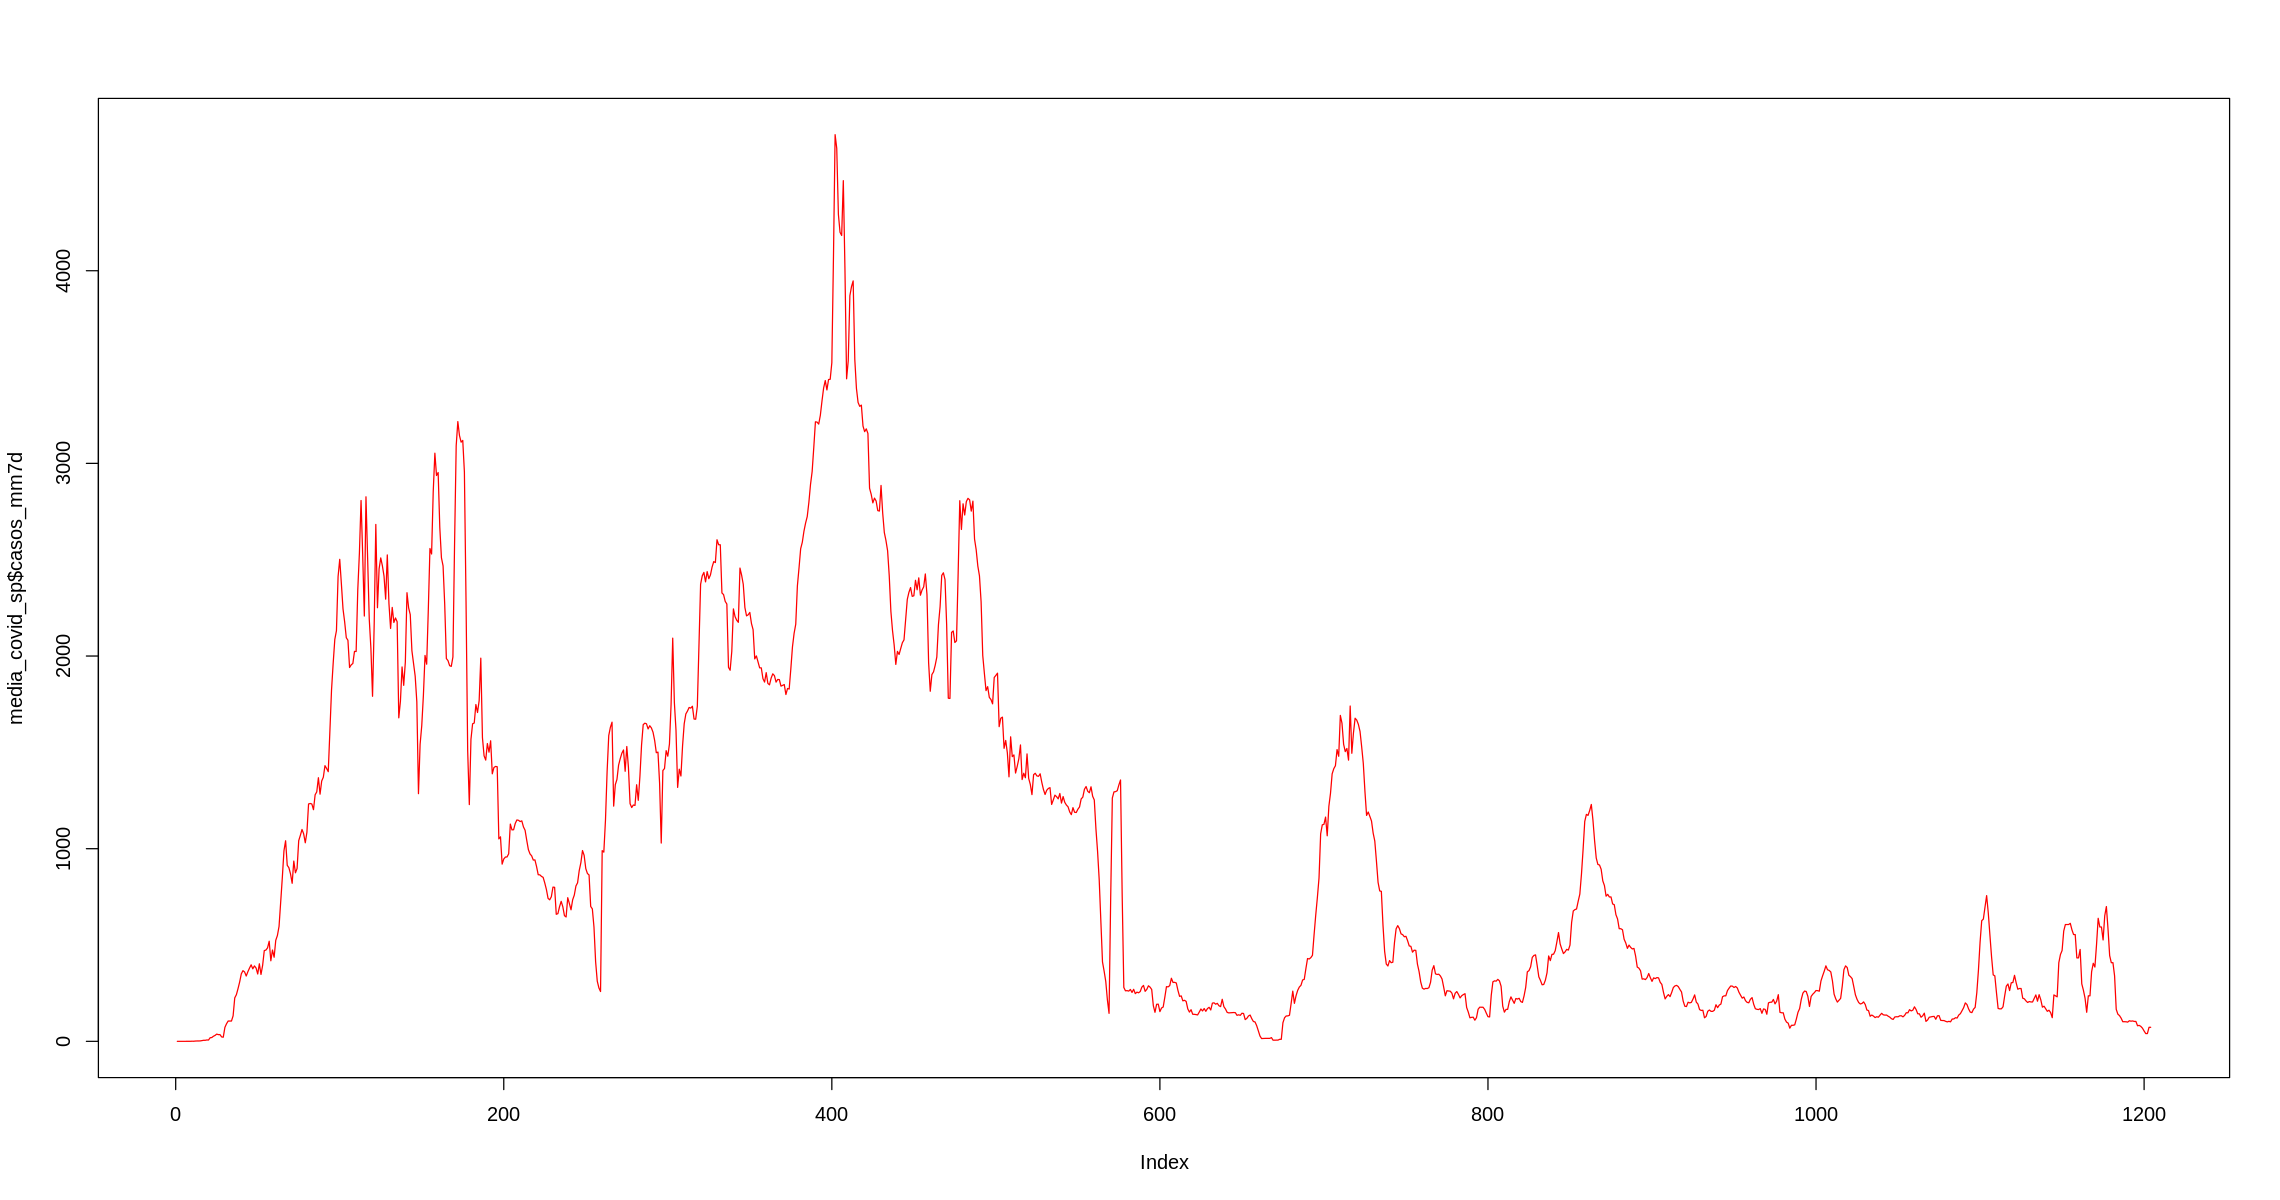

In [27]:
#média móvel fornecedia no dataframe
plot(media_covid_sp$casos_mm7d,col='red', type='l')

#####4.2-CRIAÇÃO DA NOVA MÉDIA MÓVEL

In [31]:
#criando uma nova série
serie<-
  ts(media_covid_sp$casos_novos,  start = c(2020,2,25), frequency=365.25)
print(serie)




Time Series:
Start = 2020.00273785079 
End = 2023.29637234771 
Frequency = 365.25 
   [1]    0    0    0    1    0    0    0    0    1    3    0    6    3    0
  [15]    3   11   15    0   18    0   83   11   58   45   47    0    0    0
  [29]    0  416  177  145    0    0  189  652  533  397  387  294  116  142
  [43]  504  689  530  505  149  221   66  287 1059  144  836  684  240  147
  [57]  527  349  534  575 1298  415  476 1408 1241 1511  938  407  328  251
  [71] 1067 2047 1086 1094 1420  520  464  911 1720 1471 2119 1437  502  257
  [85] 1452 1826 1985 1522 1914  640  677 1350 1710 3455 3022 2878 1512  995
  [99] 3317 2334 2570 2106 2408  935  903 2327 2431 2619 2546 2403 3173 2250
 [113] 4228  456  398 6877  184  949 1191 2483 3047 4050 3852 1596 1346  907
 [127] 2107 2209 5656 2090  688 2109  360 2271 2071 2166 2692 1934 1441 1207
 [141] 4789 1524 1916 1382 1470  979  275 1453 3318 2591 2480 2925  662 2250
 [155] 3681 3119 4857 3876 2114  770  261 2574 2823 3457 1910 2038  58

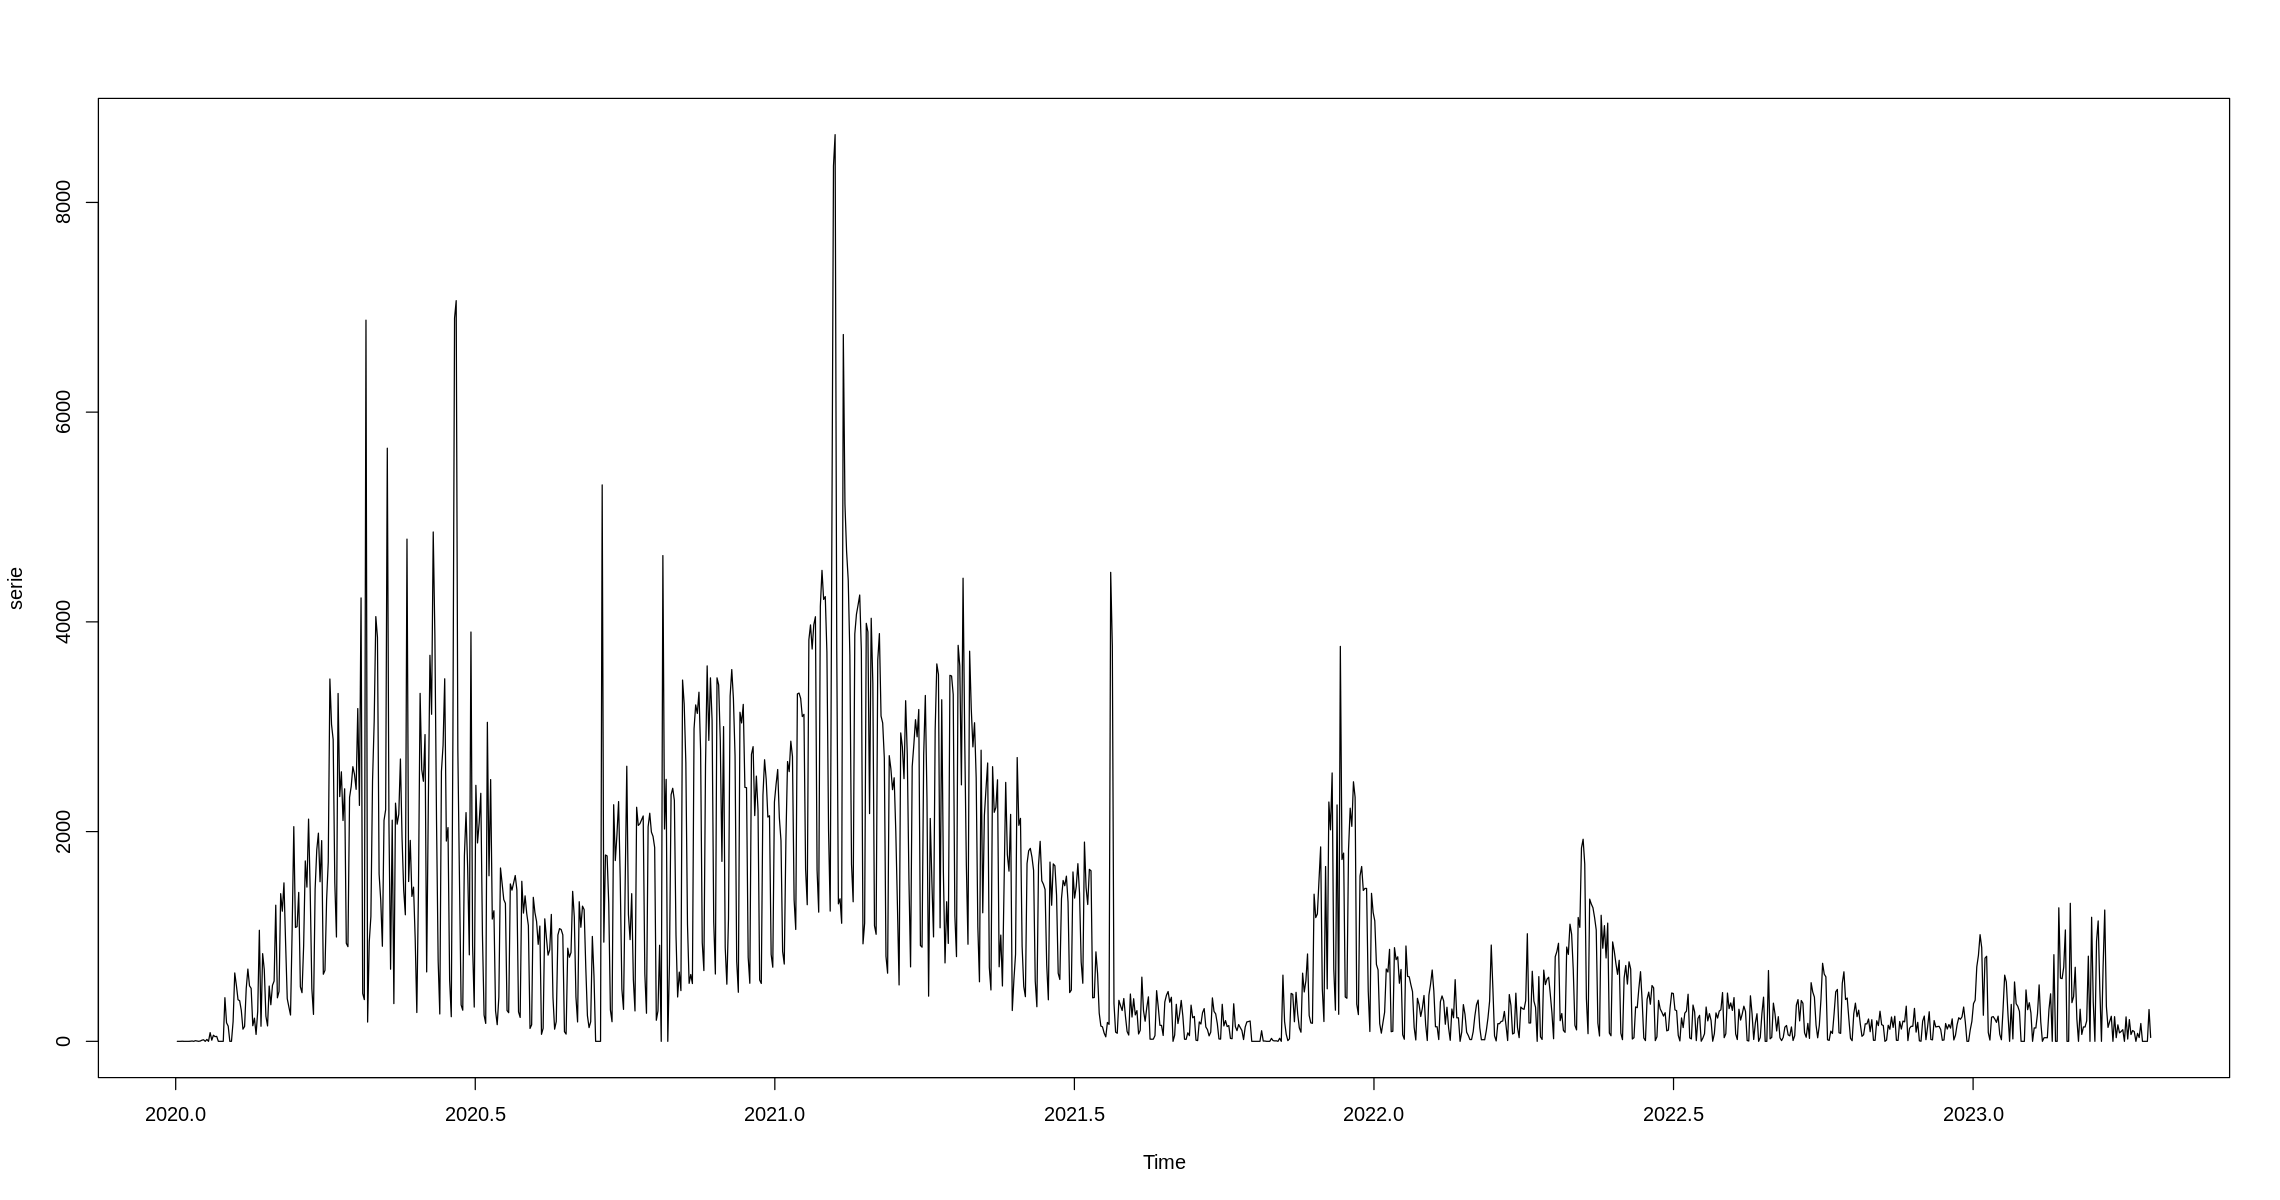

In [32]:
plot(serie)

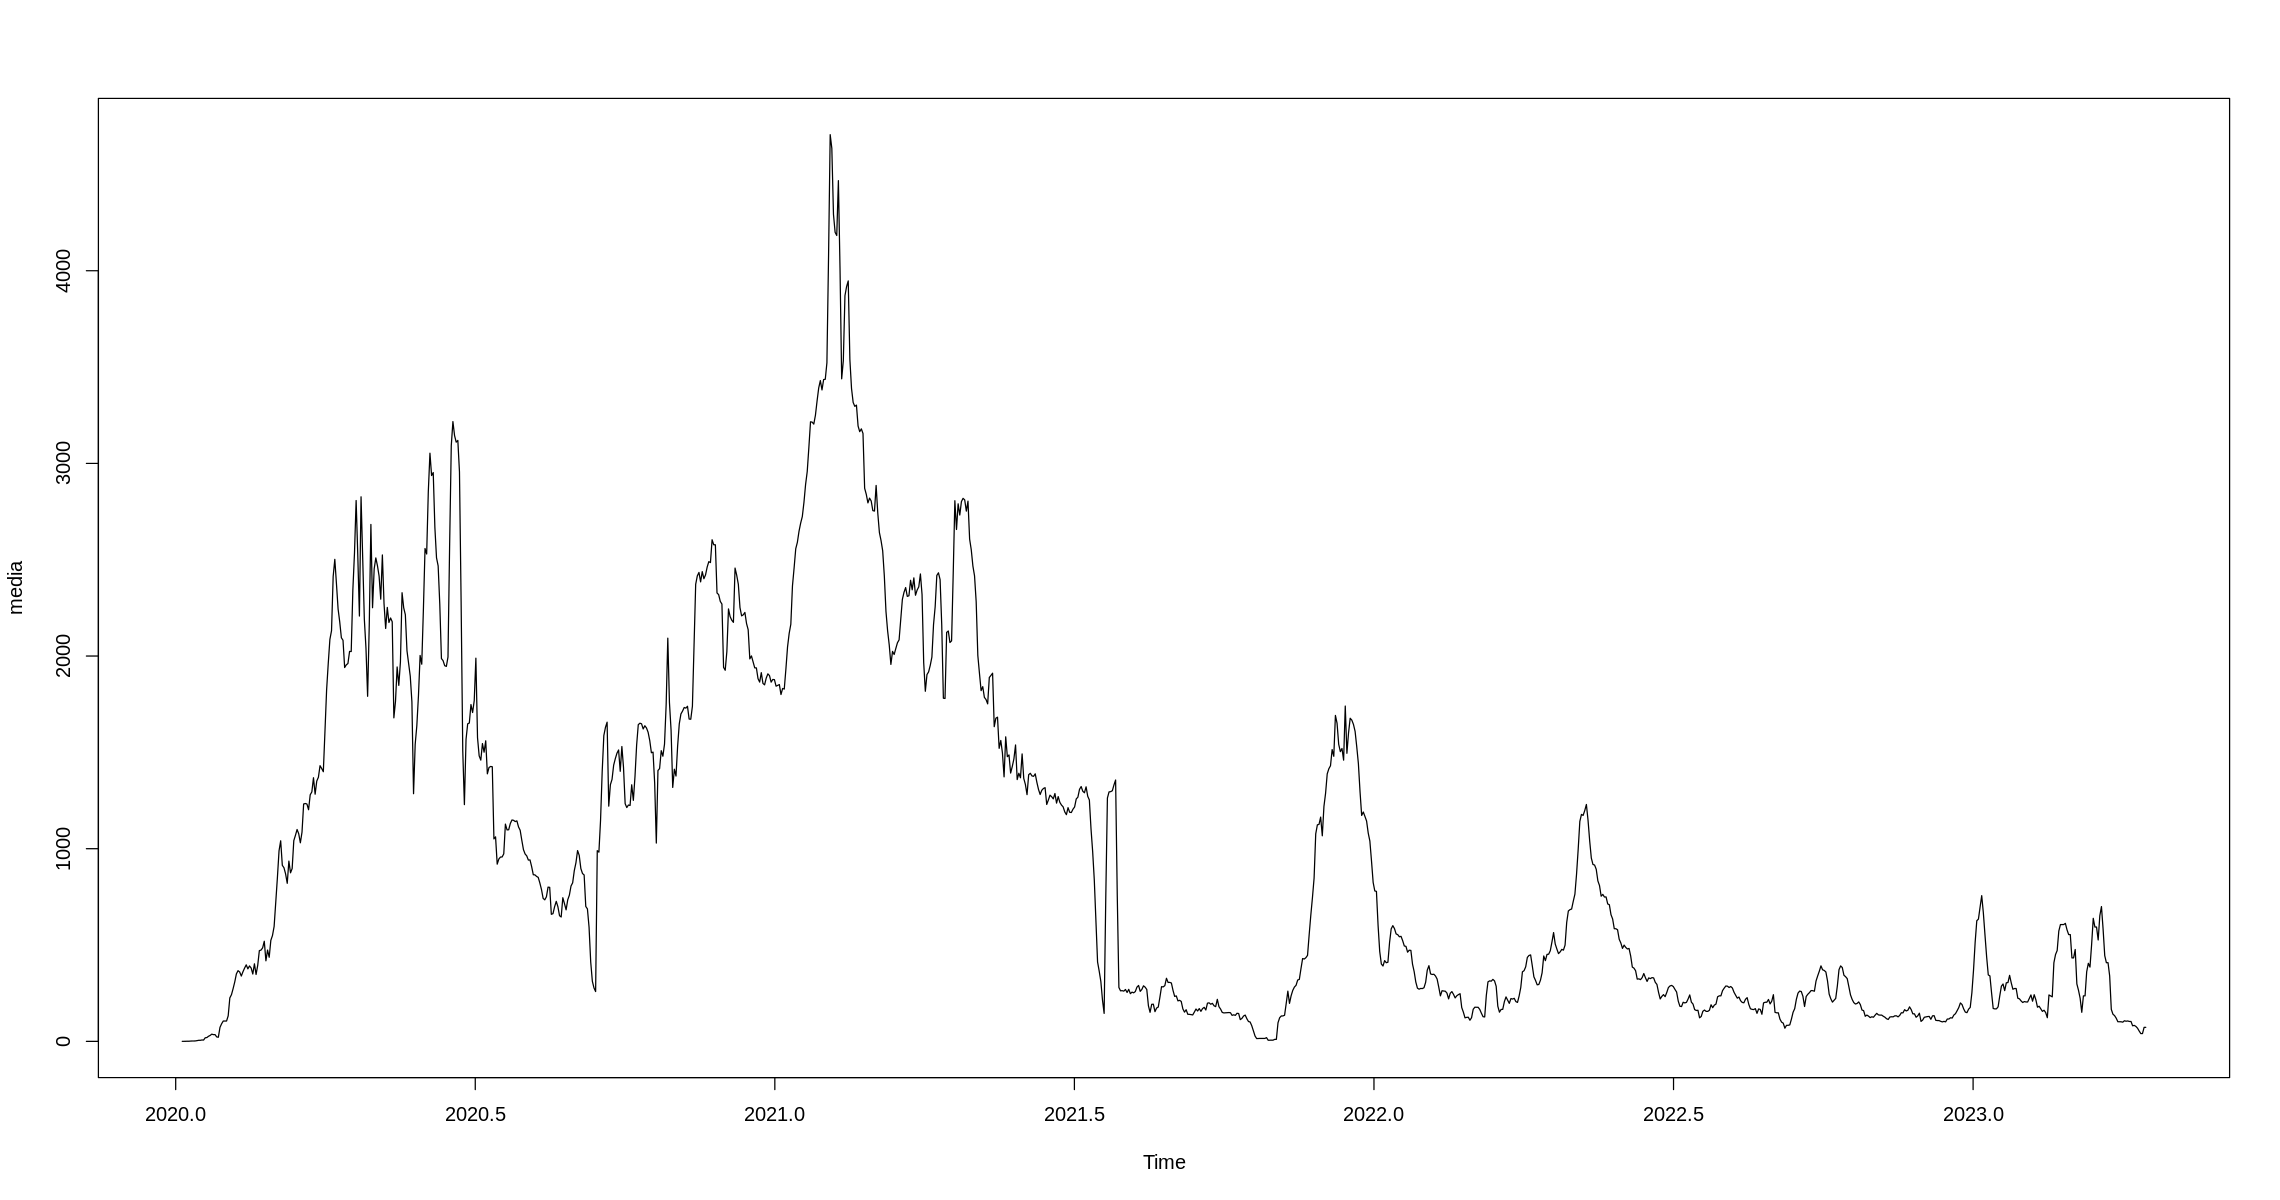

In [33]:
#CRIANDO A MÉDIA MÓVEL

media<-
  ma(serie, order = 7,centre = TRUE)
plot(media)

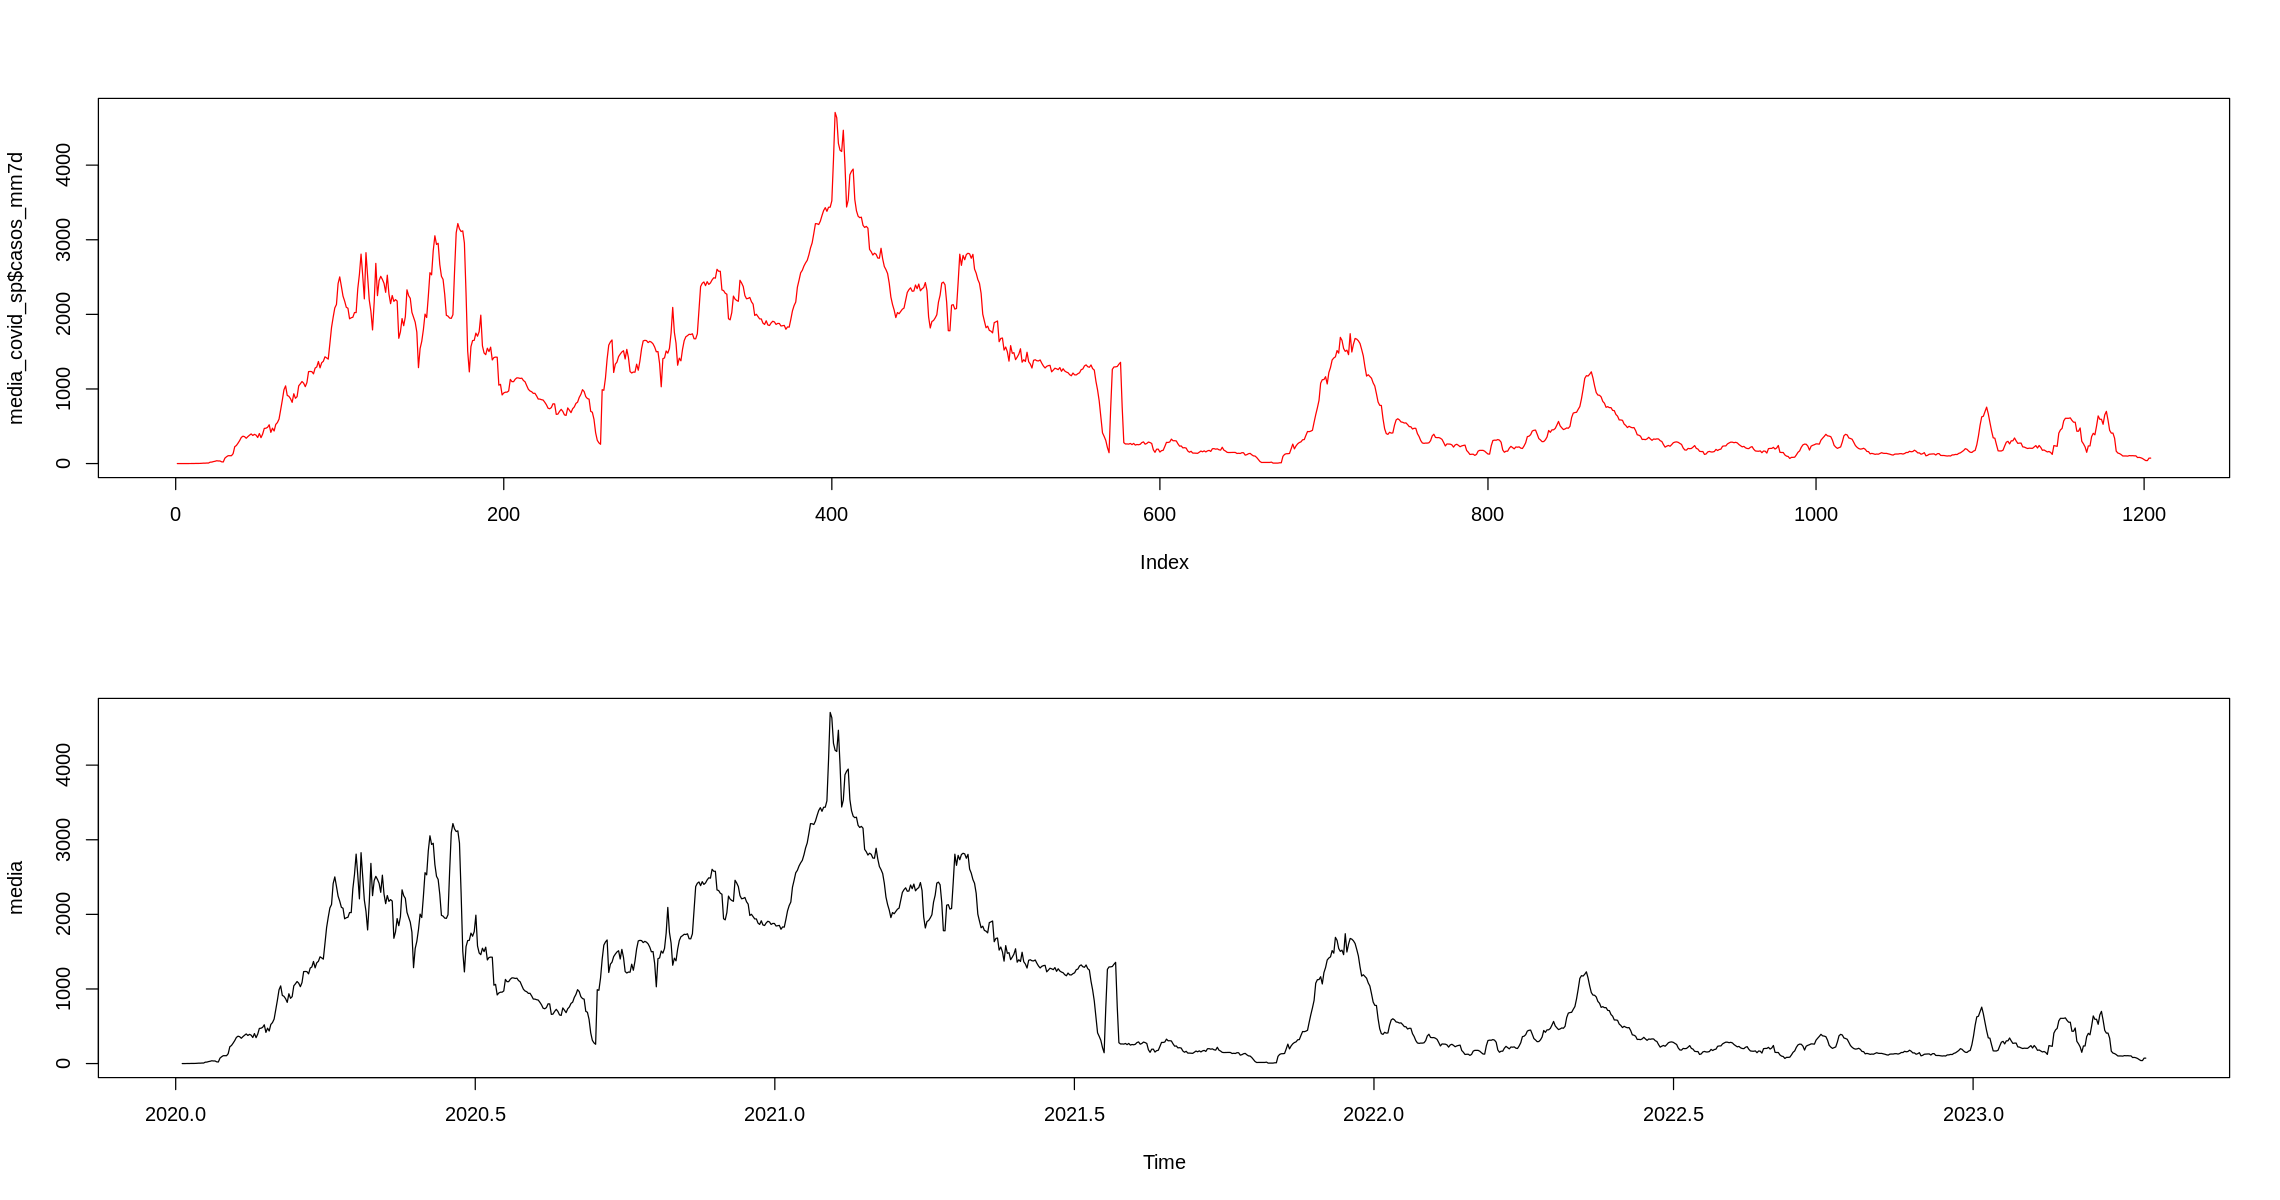

In [37]:
#comparando as 2 médias
par(mfrow=c(2,1))
plot(media_covid_sp$casos_mm7d, col="red", type = "l")
plot(media)


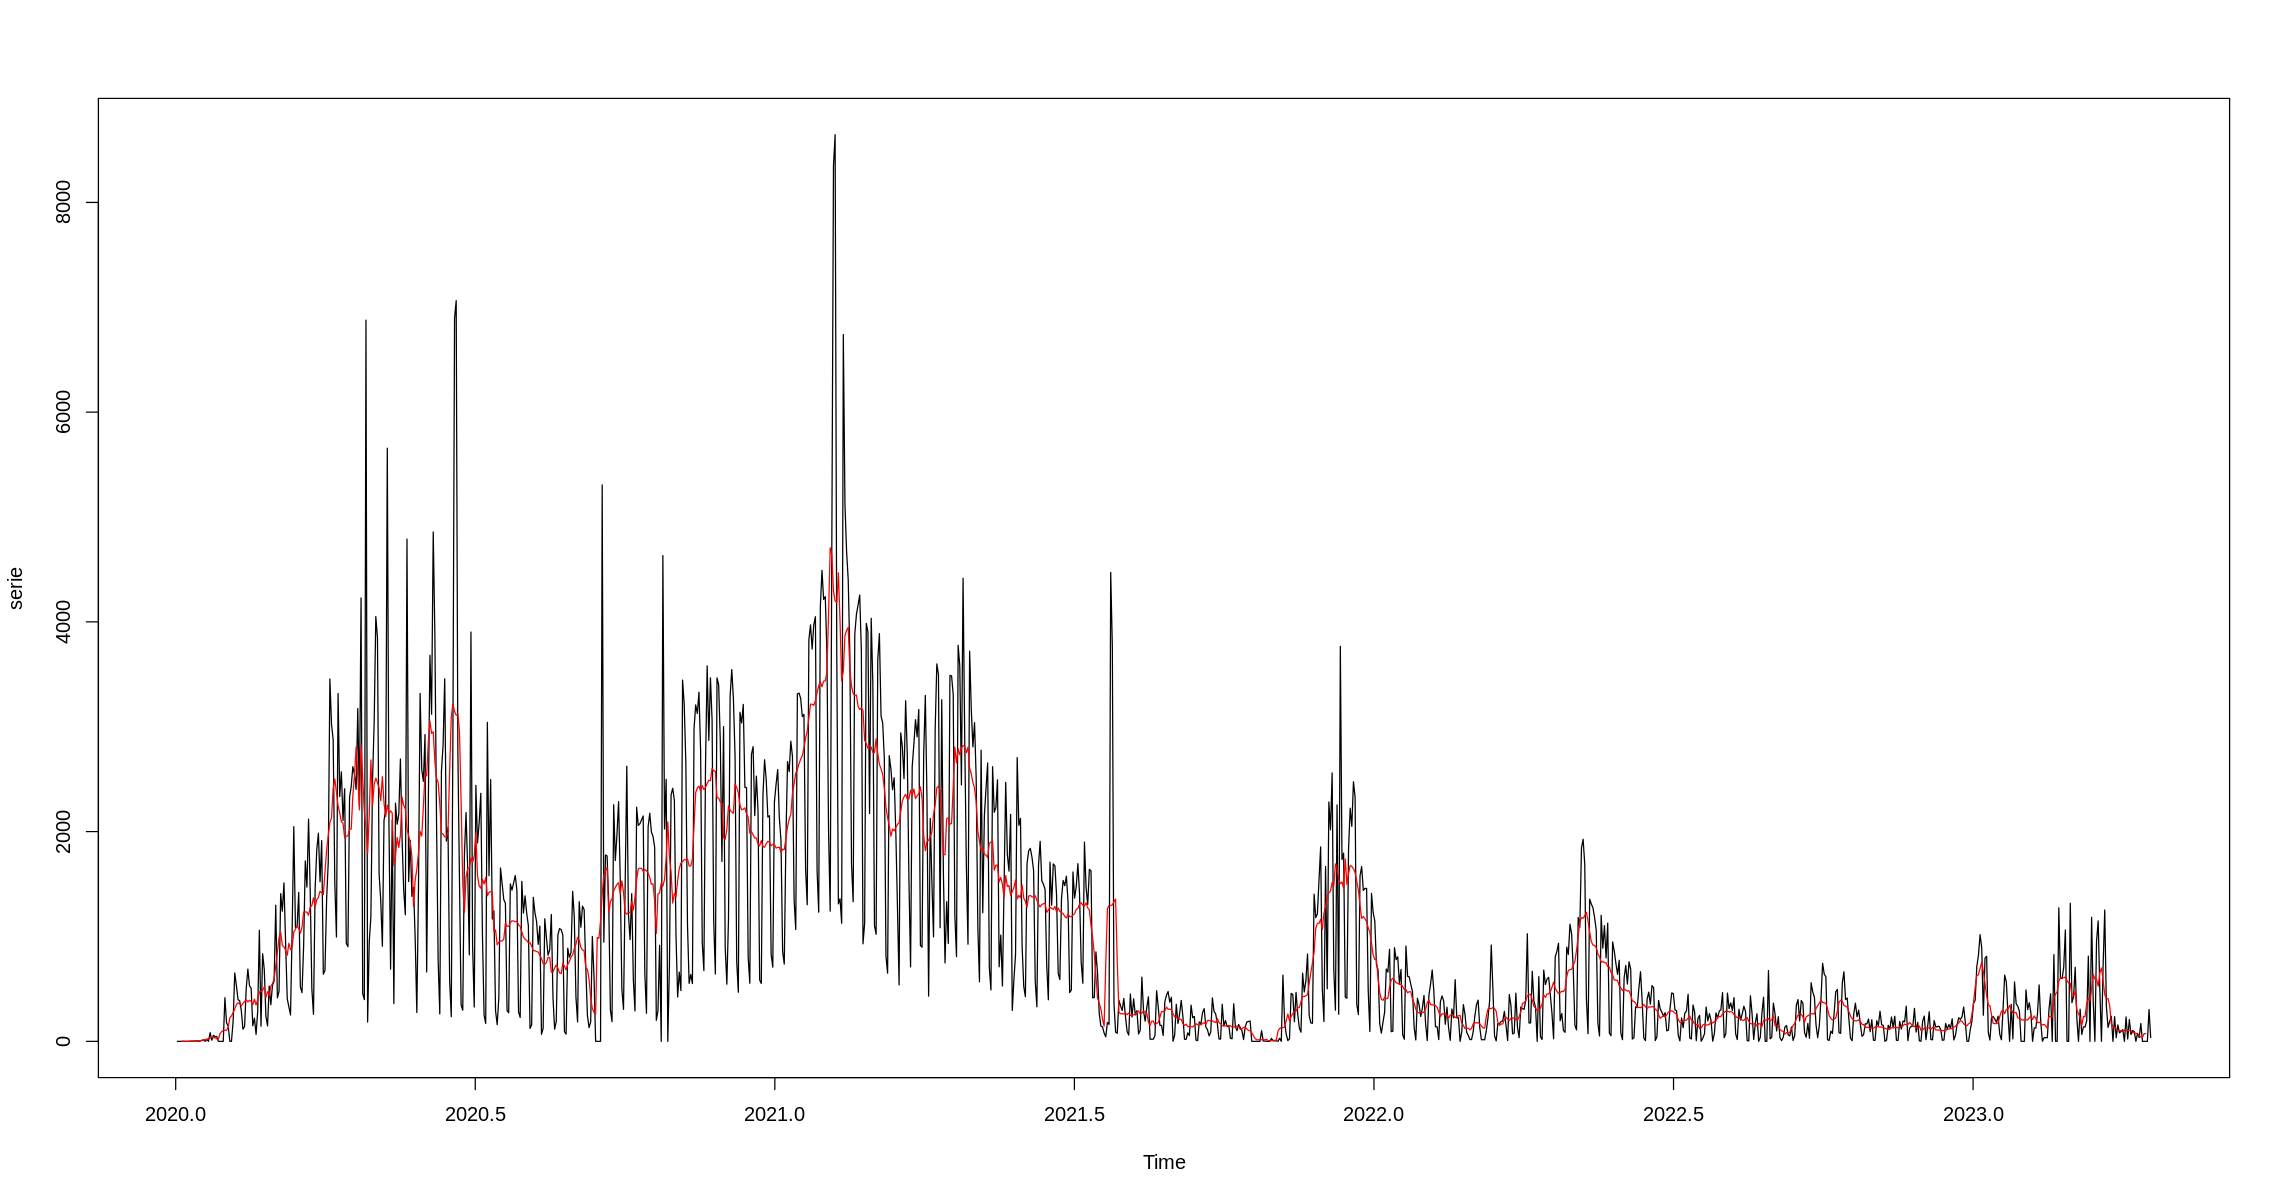

In [39]:
#plotando a média móvel na série
plot(serie)
lines(media, col='red')

#####4.3-CRIAÇÃO DA MÉDIA MÓVEL COM ÓBITOS NOVOS

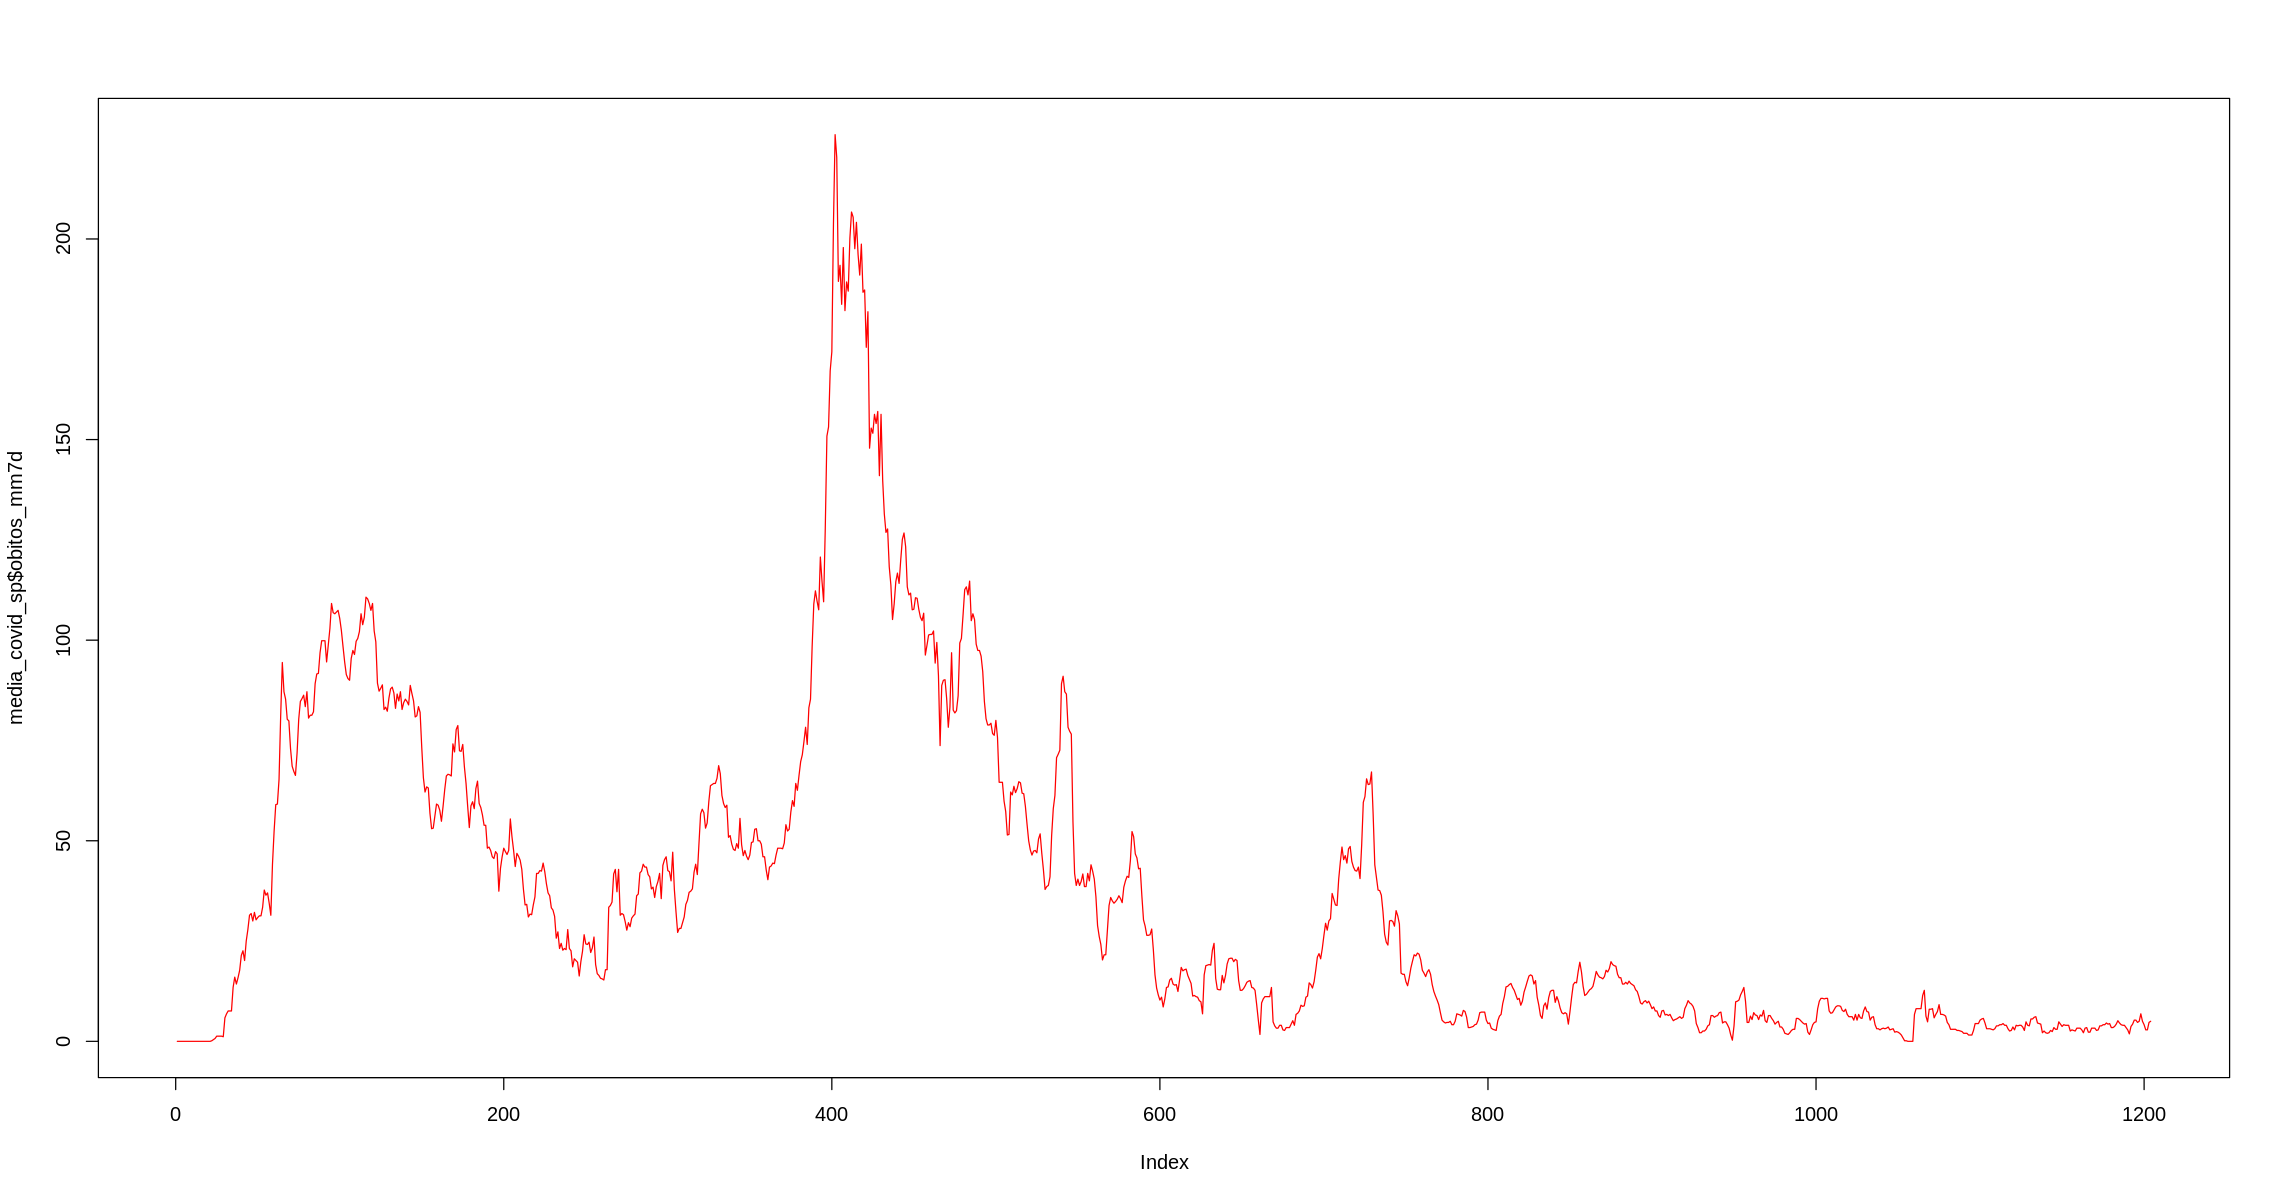

In [40]:
plot(media_covid_sp$obitos_mm7d, col="red", type = "l")

In [41]:
#criando nova série
serie2<-
  ts(media_covid_sp$obitos_novos, start = c(2020,2,25), frequency = 365.25)
print(serie2)

Time Series:
Start = 2020.00273785079 
End = 2023.29637234771 
Frequency = 365.25 
   [1]   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  [19]   0   0   0   1   2   2   4   0   0   0   0  35   9   9   0   0  41  18
  [37]  23  20  22  26   8  24  52  43  45  25  13  23  11  56  46  45  40  43
  [55]  14  15  38  25 134  98  89  15  58 149 118  83  85  54  12  10 118 109
  [73]  76 124 113  43  15 124  89 102  78 118  43  21 173 106 103 114 139  43
  [91]  21 136 135 132 158 123  41  24 139 121 111 130  96  19  17 136 159 125
 [109] 123 119  24  29 167 140 138 158 116  16  17 179  92 119  86 102  21  23
 [127] 136  96 112 109 118  24  13 109 121 100 125  87  36  19 105 115 134 111
 [145]  74   8  21 121 105  73  58  49  17  19  77  78  74  79  70  15  10  58
 [163] 104 103 103  73  14   8 114  90 142 110  29  13  20  75  61 102  73  67
 [181]  20   8 110  74  63  66  54   2   8  70  76  57  55  51  14   4   5 116
 [199]  77  70  45   9  11  60  85  53  42  68  

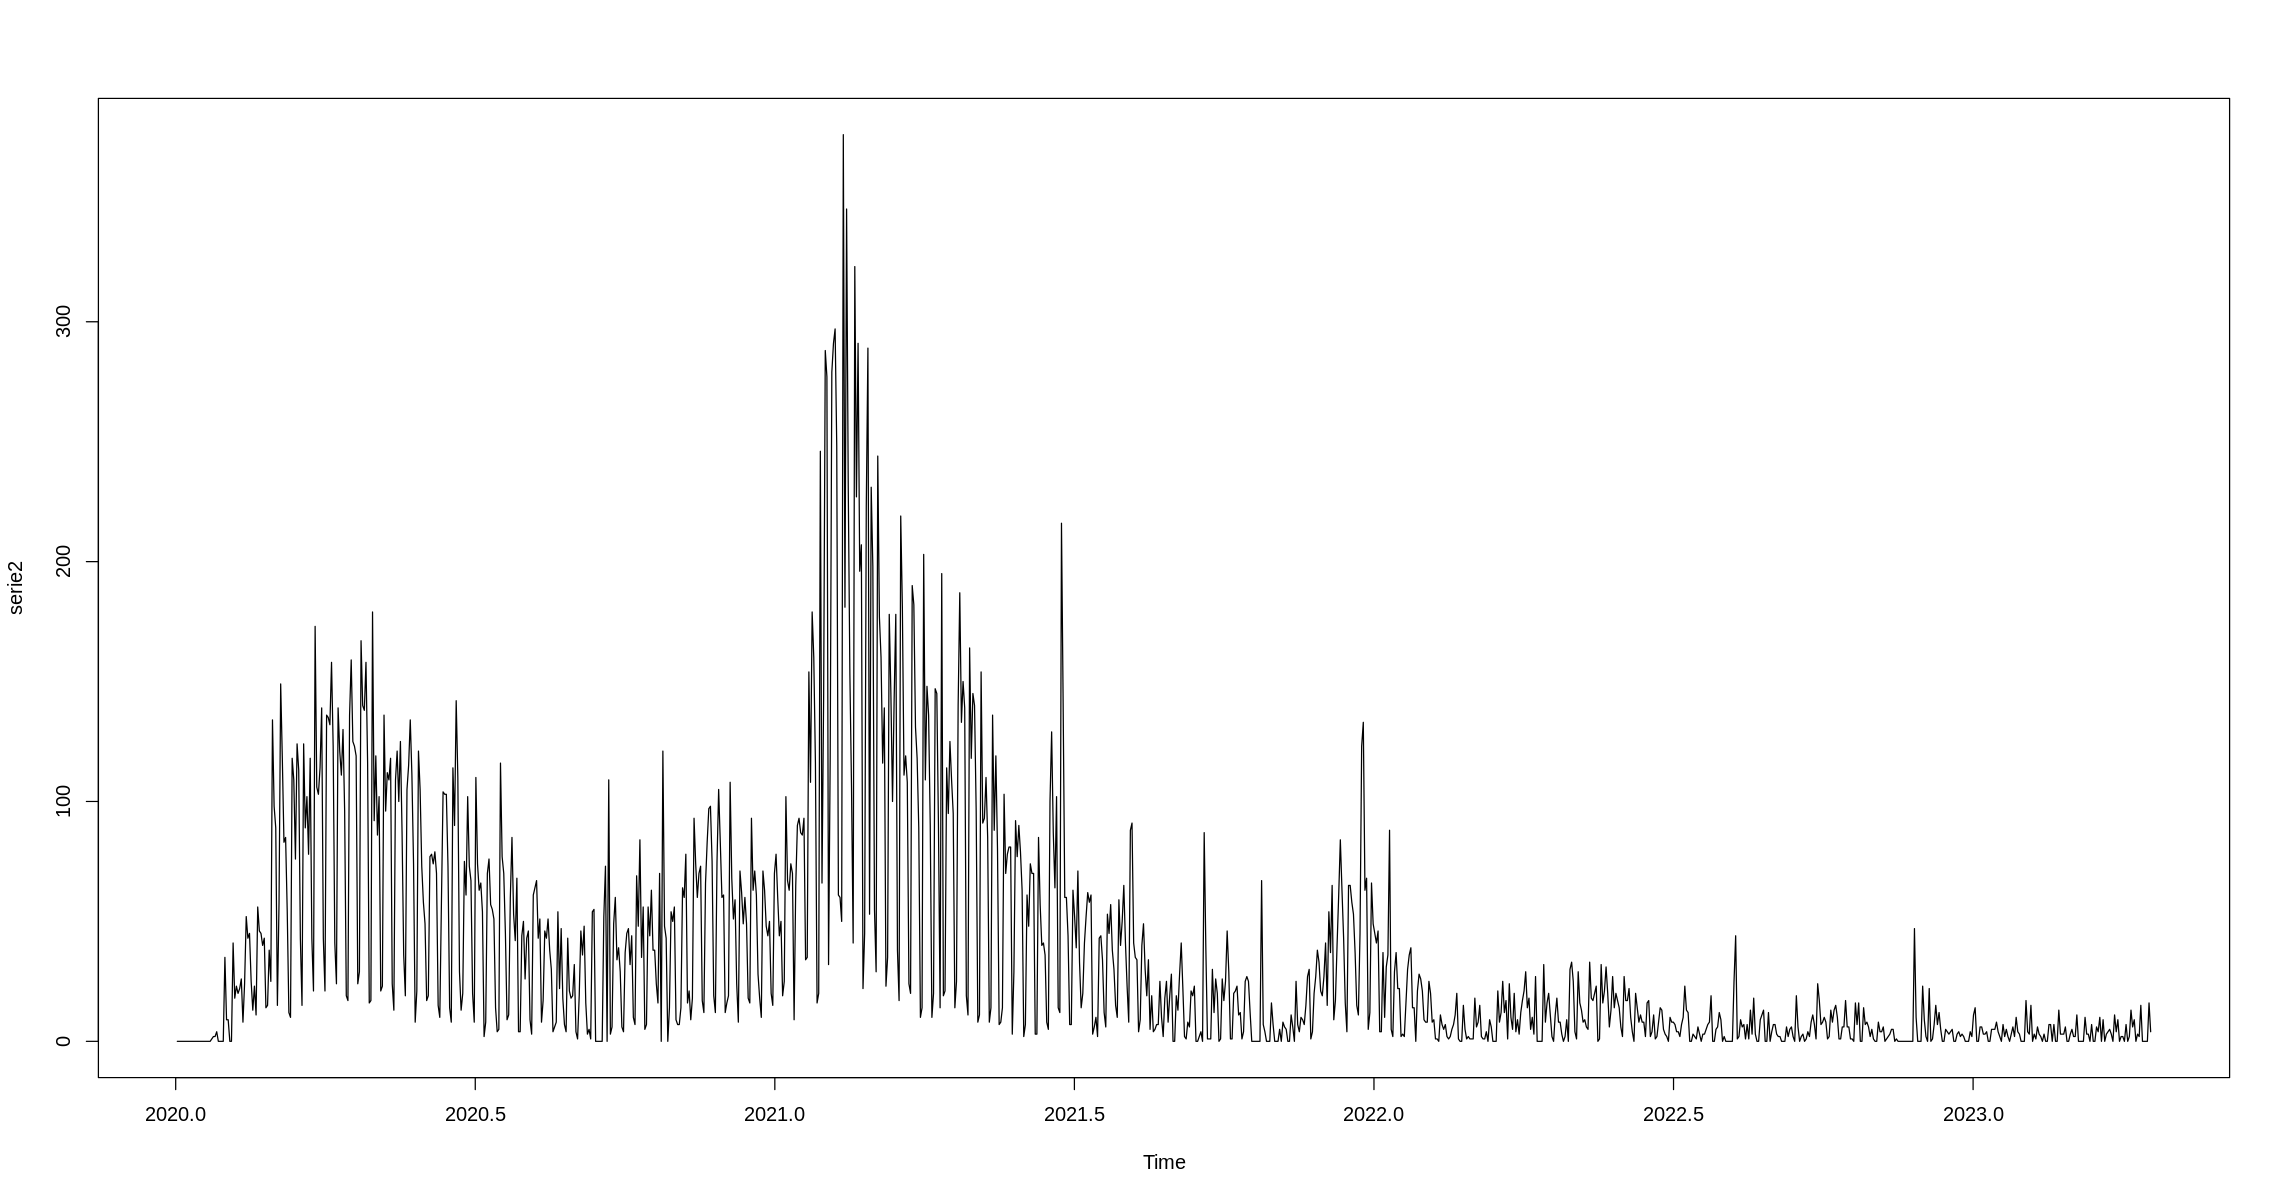

In [42]:
plot(serie2)

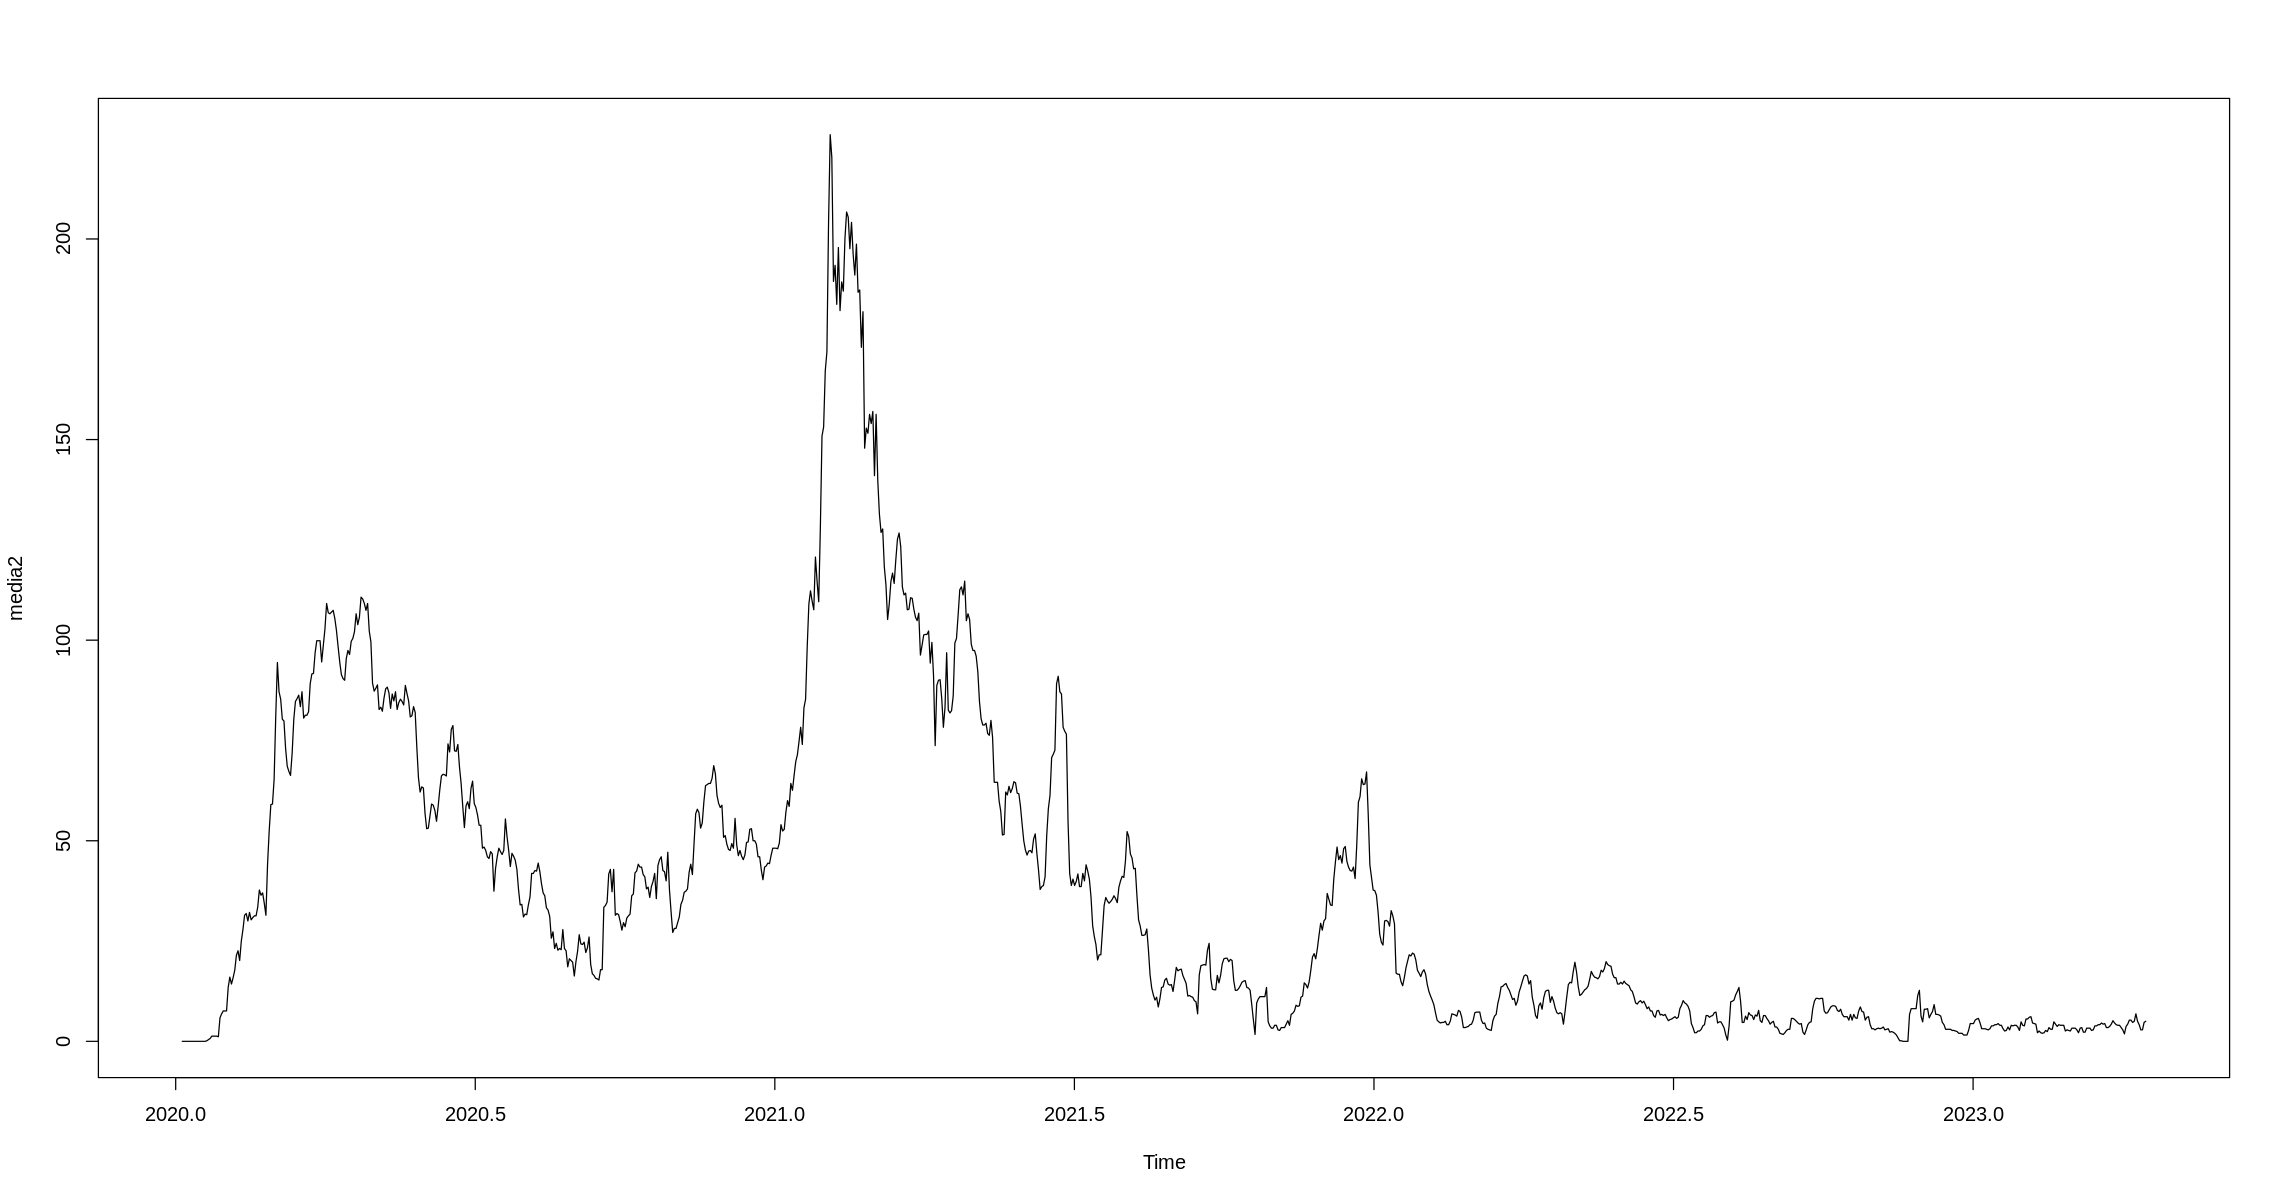

In [43]:
#CRIANDO A MÉDIA MÓVEL

media2<-
  ma(serie2, order = 7,centre = TRUE)
plot(media2)

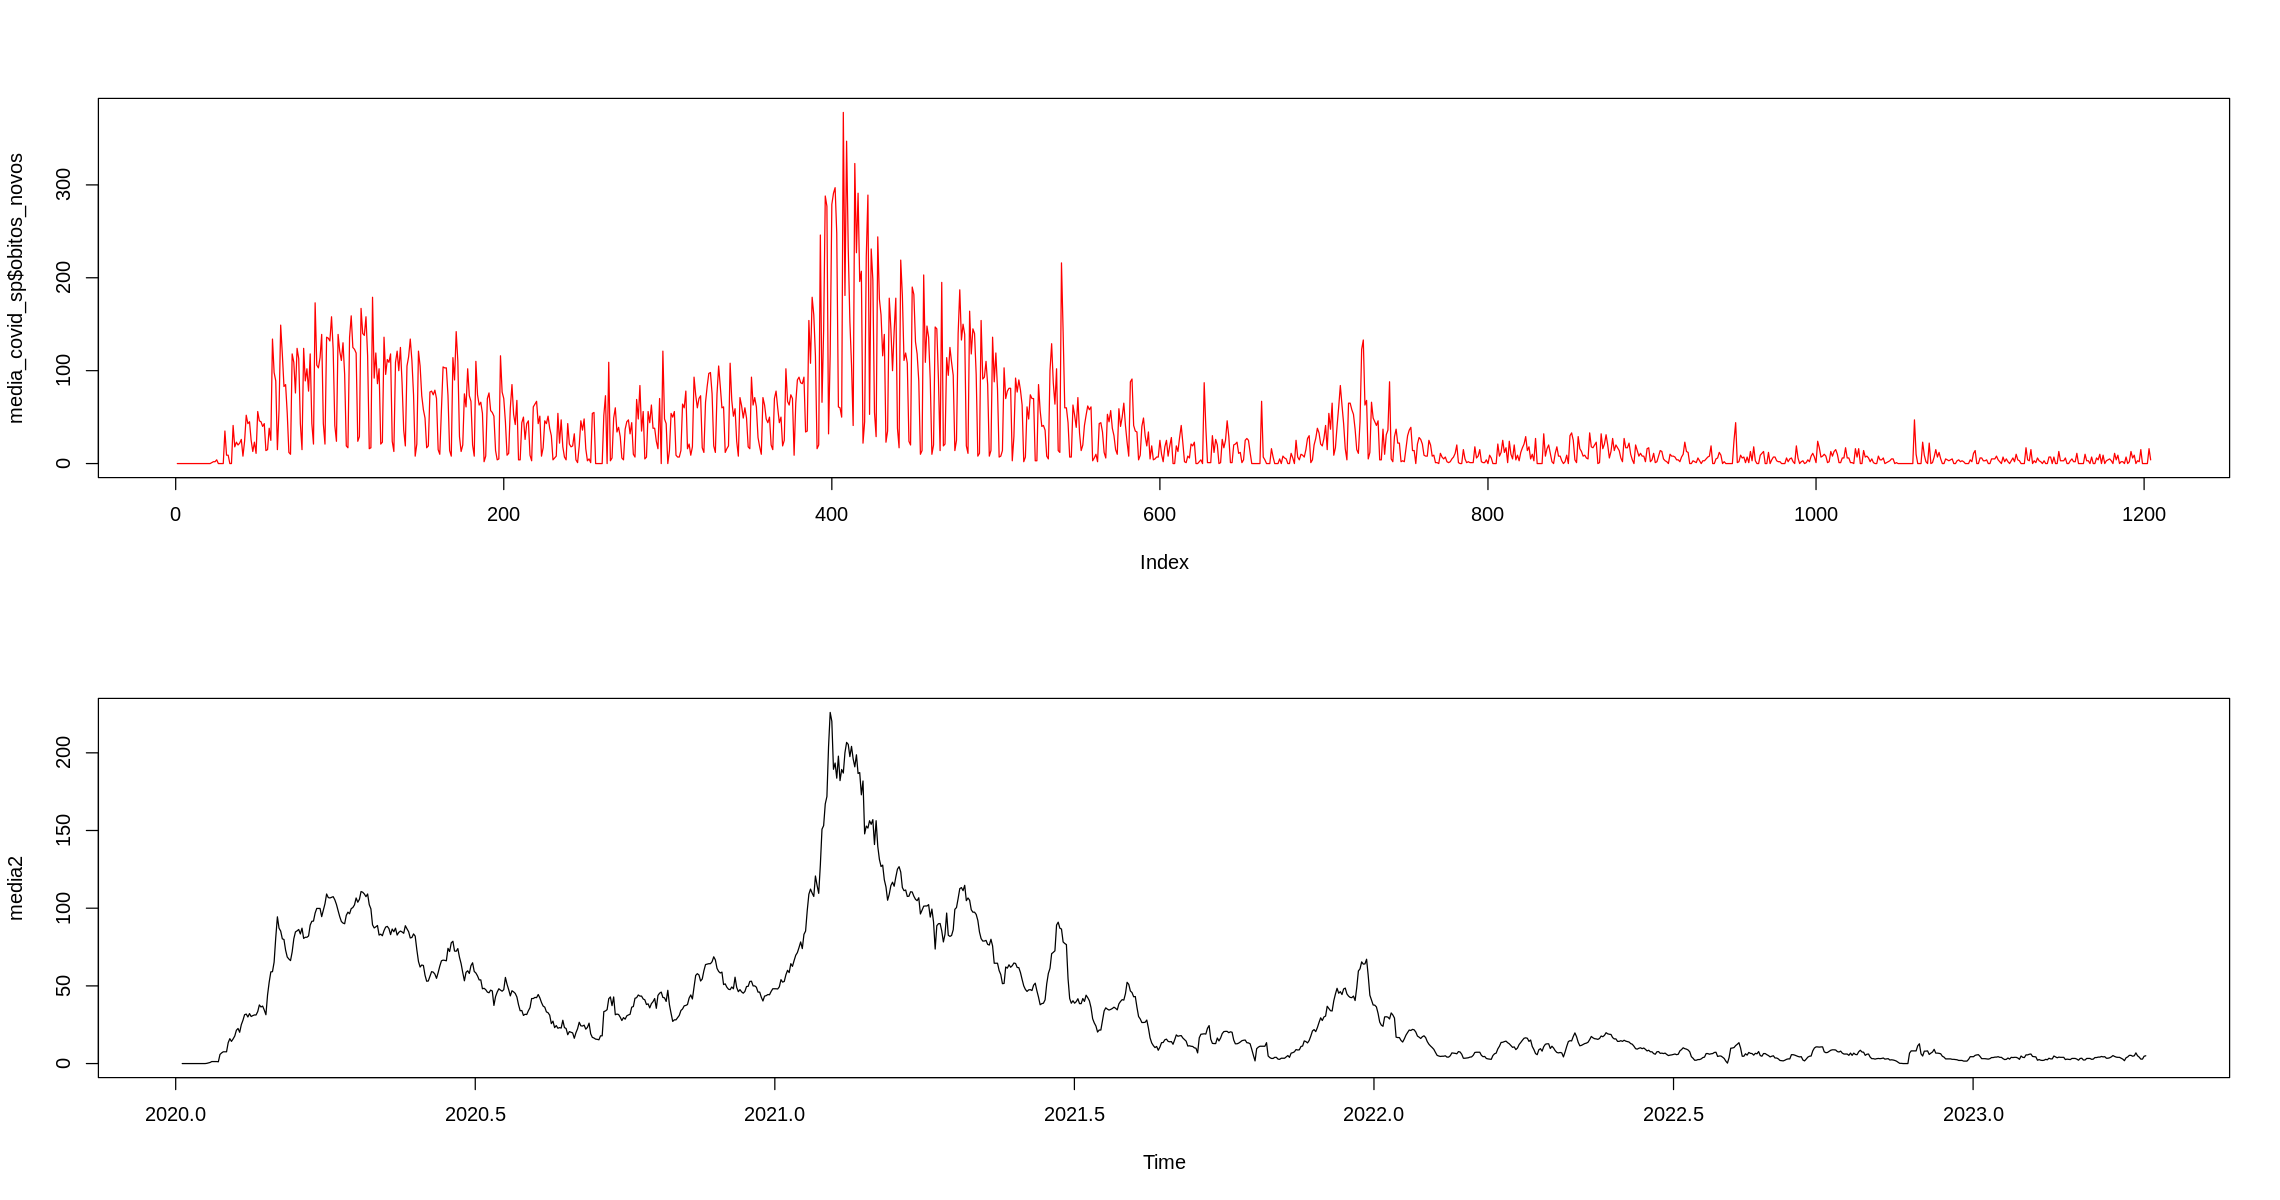

In [44]:
#comparando as 2 médias
par(mfrow=c(2,1))
plot(media_covid_sp$obitos_novos, col="red", type = "l")
plot(media2)

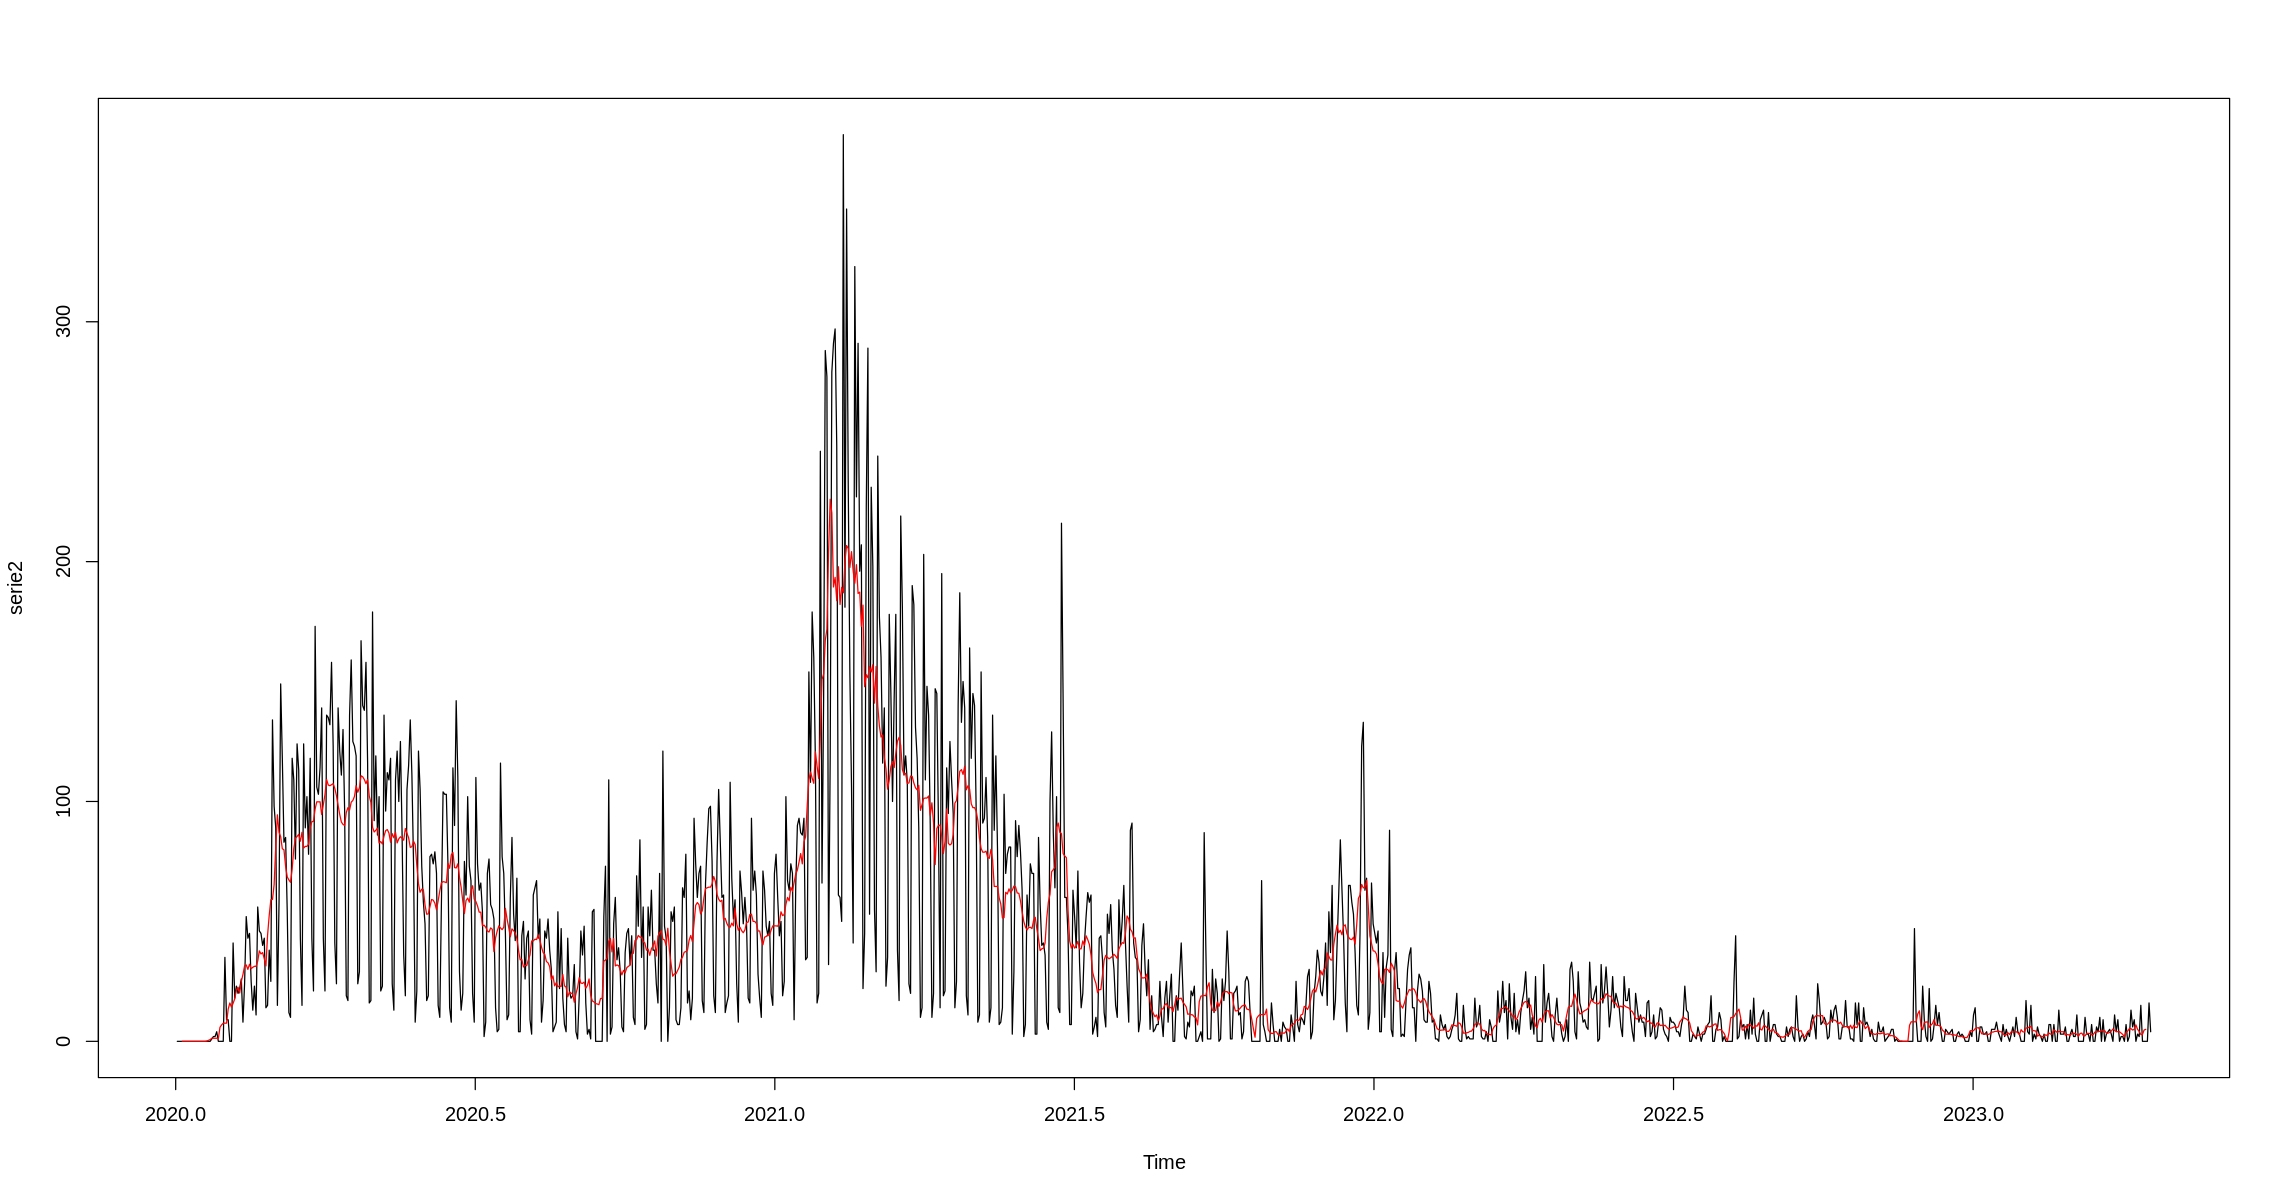

In [45]:
#plotando a média móvel na série
plot(serie2)
lines(media2, col='red')

####5-CONCLUSÃO
As médias móveis graficamente acompanham os dados das médias de casos de covid, assim como a média de óbitos.
